In [2]:
import numpy as np
import pandas as pd
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from ipywidgets import interact, IntSlider, fixed, FloatSlider
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('/Users/aptem/Downloads/archive/test.csv')
train.info()
train = train[::50]
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
Unnamed: 0                           25976 non-null int64
id                                   25976 non-null int64
Gender                               25976 non-null object
Customer Type                        25976 non-null object
Age                                  25976 non-null int64
Type of Travel                       25976 non-null object
Class                                25976 non-null object
Flight Distance                      25976 non-null int64
Inflight wifi service                25976 non-null int64
Departure/Arrival time convenient    25976 non-null int64
Ease of Online booking               25976 non-null int64
Gate location                        25976 non-null int64
Food and drink                       25976 non-null int64
Online boarding                      25976 non-null int64
Seat comfort                         25976 non-null int64
Inflight entertai

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
50,50,110840,Female,Loyal Customer,58,Personal Travel,Eco Plus,990,3,5,...,1,1,2,1,5,1,3,0,0.0,neutral or dissatisfied
100,100,68873,Female,disloyal Customer,36,Business travel,Eco,1061,2,2,...,4,1,4,2,4,2,4,13,0.0,neutral or dissatisfied
150,150,109359,Female,Loyal Customer,56,Business travel,Business,1189,5,5,...,2,2,2,2,4,2,3,9,0.0,satisfied
200,200,73465,Female,Loyal Customer,39,Personal Travel,Eco,1005,1,4,...,5,2,4,5,5,4,5,168,163.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25750,25750,28187,Female,Loyal Customer,27,Personal Travel,Eco,834,1,4,...,2,4,4,5,5,4,2,0,0.0,neutral or dissatisfied
25800,25800,79937,Female,Loyal Customer,40,Business travel,Business,1989,2,2,...,5,5,5,5,4,5,5,0,0.0,satisfied
25850,25850,65753,Female,Loyal Customer,59,Personal Travel,Eco,936,2,3,...,2,2,2,2,1,2,4,0,0.0,neutral or dissatisfied
25900,25900,92469,Male,disloyal Customer,31,Business travel,Eco,1947,3,3,...,1,2,5,4,4,3,1,18,14.0,neutral or dissatisfied


In [4]:
def transform_gender(x):   
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
    
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
    
def process_data(df):
    df = df.drop(['Unnamed: 0', 'id'], axis = 1)
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    
    return df

train = process_data(train)

In [5]:
features = train.columns.tolist()
target = features.pop(4)
X = train[features]
y = train[target]

In [6]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size = 0.15)

<function matplotlib.pyplot.show(*args, **kw)>

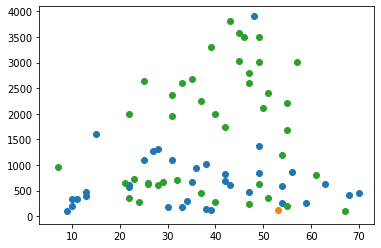

In [7]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
for i in y.unique():
    plt.scatter(x_test["Age"][y_pred == i], x_test["Flight Distance"][y_pred == i])
plt.show

In [9]:
def calc_acc(y_pred, y_test):
    acc = 0
    for i,j in zip(y_pred, y_test):
        if i == j:
            acc += 1 
    acc /=len(y_test)
    return acc
calc_acc(y_pred, y_test)

0.5512820512820513

In [10]:
def calc_prec(y_pred, y_test):
    prec = 0
    rec = 0
    for i,j in zip(y_pred, y_test):
        if i == j and i == 2:
            prec+=1 
        if i != j and i == 2:
            rec += 1 
    prec /= (prec + rec)
    return prec
calc_prec(y_pred, y_test)

0.5238095238095238

In [11]:
def calc_recall(y_pred, y_test):
    prec = 0
    recall = 0
    for i,j in zip(y_pred, y_test):
        if i == j and i == 2:
            recall += 1
        if i != j and i == 2:
            prec += 1 
    recall /= (recall + prec)
    return recall
calc_recall(y_pred, y_test)

0.5238095238095238

In [12]:
def neighbours (n_neighbors=3):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    return calc_acc(y_pred, y_test)
interact(neighbours, n_neighbors=IntSlider(min=1, max=15, step=1))

interactive(children=(IntSlider(value=1, description='n_neighbors', max=15, min=1), Output()), _dom_classes=('…

<function __main__.neighbours(n_neighbors=3)>

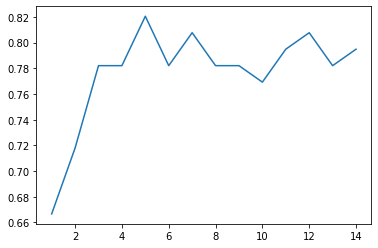

In [11]:
pr2=[]
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(x_train, y_train)
    y_hat2=knn.predict(x_test)
    pr2.append(calc_acc(y_hat2, y_test))
plt.plot(range(1, 15), pr2)

In [14]:
cross = []
g_acc = 0
for i in range(0,5):
    X_train, X_test, Y_train, Y_test = train_test_split(train, y)
    acc = 0
    for k in range(1, 10):
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean').fit(X_train, Y_train)
        y_pred = knn.predict(X_test)
        if calc_acc(y_pred, y_test) > acc:
            acc = calc_acc(y_pred, y_test)
            mod = knn
            if acc > g_acc:
                g_acc = acc
    cross.append([mod,acc])
for i in range(0,5):
    if cross[i][1] == g_acc:
        print(cross[i])
        
cross

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'), 0.5769230769230769]


[[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                       metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                       weights='uniform'), 0.46153846153846156],
 [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                       metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                       weights='uniform'), 0.46153846153846156],
 [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                       metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                       weights='uniform'), 0.48717948717948717],
 [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                       metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                       weights='uniform'), 0.46153846153846156],
 [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                       metric_params=None, n_jobs=None, n_nei